In [105]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# import keras.backend as K

def getGaborFilter(shape):
    all_kernels = []
    
    for i in range(shape[0]):
        kernels = []
        
        for j in range(shape[1]):
            kernels.append(
                cv.getGaborKernel(
                    ksize = (shape[3], shape[2]), 
                    sigma = 5,
                    theta = 10,
                    lambd = 5,
                    gamma = 0.75 * j,
                    psi = 1
                )
            )
            
        all_kernels.append(np.array(kernels))
        
    return np.array(all_kernels)

In [106]:
gbr = getGaborFilter((1, 3, 30, 30))

In [107]:
gbr.shape

(1, 3, 31, 31)

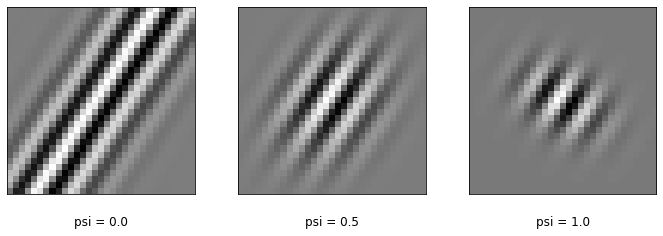

In [108]:
fig = plt.figure(figsize = (20, 20))

c = 0
for i in range(gbr.shape[1]):
    y = fig.add_subplot(5, 5, c + 1)
    kernel = gbr[0, i, :, :]
    
    y.imshow(kernel, cmap = 'gray')
    plt.title('psi = ' + str(0.5 * i), y = -0.2)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
    c += 1

In [132]:
def gaborFilter(width, height, lambd, theta, psi, sigma, gamma):
    gabor = np.zeros(shape = (height, width))
    
    for y in range(int(-height/2), int(height/2) + 1):
        for x in range(int(-width/2), int(width/2) + 1):
            x_aksen = x * np.cos(theta) + y * np.sin(theta)
            y_aksen = -x * np.sin(theta) + y * np.cos(theta)
            gabor[y + int(height/2)][x + int(width/2)] = np.exp(-(x_aksen ** 2 + ((gamma ** 2) * (y_aksen ** 2))) / (2 * (sigma ** 2))) * np.cos((((2 * np.pi * x_aksen) / lambd) + psi))
                                                                                                                 
    return gabor

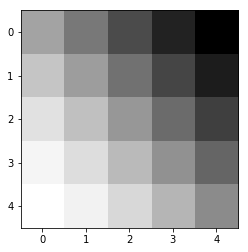

In [134]:
gbr = gaborFilter(5, 5, 
                  sigma = 20,
                  theta = 15,
                  lambd = 16,
                  gamma = 0.75,
                  psi = 5)

plt.imshow(gbr, cmap = 'gray')

In [137]:
gbr

array([[ 0.36285133,  0.07485836, -0.22045163, -0.49524106, -0.72374205],
       [ 0.5859499 ,  0.32412617,  0.03220789, -0.26230154, -0.53167295],
       [ 0.77030616,  0.55241957,  0.28366219, -0.01070661, -0.30291354],
       [ 0.90296557,  0.7436584 ,  0.5162058 ,  0.24187452, -0.05344289],
       [ 0.97481688,  0.8845161 ,  0.71353085,  0.47768158,  0.19919492]])